## 4. Feladatsor 

(pszeudo-)véletlen számok

#### 0. Feladat:

Írjunk függvényt kockával való dobás szimulálására. Általánosítsuk megoldásunkat `k` darab `d` oldalú kockára.

In [1]:
rand(3, 1)

randi(6, 3, 1)

randn(3)

ans =

   0.029473
   0.830784
   0.433380

ans =

   6
   5
   5

ans =

   1.542138   0.293972   3.023957
   0.438933   0.547500   0.031440
  -0.078423   2.692109   1.236835



In [2]:
function die = throw_die()
    die = randi(6);
end

In [3]:
function throws = throw_dice(k)
    throws = randi(6, 1, k);
end

throw_dice(10)

mean(throw_dice(1000))

std(throw_dice(1000))

ans =

   6   5   3   5   2   2   2   1   5   1

ans =  3.4800
ans =  1.6986


In [4]:
function throws = throw_d_dice(k, d)

end

In [5]:
throws = throw_dice(10)

throws == 6
sum(throws == 6)

throws =

   2   1   4   3   1   5   6   3   4   1

ans =

  0  0  0  0  0  0  1  0  0  0

ans =  1


In [6]:
throws
throws(throws <= 3)

throws =

   2   1   4   3   1   5   6   3   4   1

ans =

   2   1   3   1   3   1



In [7]:
(throws <= 3) .* ( (-1) * throws) + (throws > 3) .* throws

ans =

  -2  -1   4  -3  -1   5   6  -3   4  -1



#### 1.feladat:

Tekintsünk egy szimmetrikus bolyongást ($\mathbb Z$-n), azaz legyen $X_0 = 0$, majd
$$
  X_{k+1} = X_k + d_k,
$$

ahol $d_k$ értéke $\frac12$ valószínűséggel $1$, $\frac12$ valószínűséggel $-1$.

Szimuláljuk néhány ilyen bolyongás néhány lépését, majd ábrázoljuk is ezeket az idő függvényében.

In [8]:
2*(randi(2, 1, 10) - 1.5)

ans =

   1  -1  -1   1  -1   1  -1  -1   1  -1



In [9]:
steps = 2*(randi(2, 1, 10) - 1.5)
cumsum(steps)

steps =

  -1   1  -1  -1   1  -1   1  -1   1  -1

ans =

  -1   0  -1  -2  -1  -2  -1  -2  -1  -2



In [10]:
function positions = symmetric_random_walk(n)
    steps = 2*(randi(2, 1, n) - 1.5);
    positions = [0 cumsum(steps)];
end

In [11]:
symmetric_random_walk(12)

ans =

   0  -1   0  -1   0   1   2   3   2   3   2   3   4



In [12]:
function positions = symmetric_random_walks(n, k)
    steps = 2*(randi(2, k, n) - 1.5);
    positions = [zeros(k, 1) cumsum(steps, 2)];
end

In [13]:
symmetric_random_walks(10, 2)

ans =

   0   1   2   3   4   3   4   3   2   3   4
   0   1   0  -1   0   1   2   1   0  -1   0



In [14]:
paths = symmetric_random_walks(1000, 4);

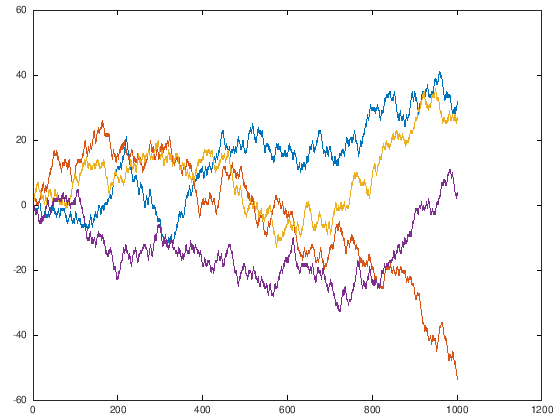

In [15]:
plot(paths')

#### 2.feladat:

Szimuláljuk a szimmetrikus bolyongás néhány lépését néhányszor, és nézzük meg, hogy átlagosan hányadik lépés során kerül a bolyongó 10 messze az origótól.

In [16]:
positions = symmetric_random_walks(10, 2)

positions =

   0   1   2   1   0  -1   0  -1   0  -1  -2
   0   1   2   1   0  -1  -2  -3  -2  -3  -4



In [17]:
max([1,2,3])

ans =  3


In [18]:
[v, ix] = max([1,3,2])

v =  3
ix =  2


In [19]:
[v, ix] = max(abs(positions(:, 2:end)) >= 2, [], 2)

mean(ix)

v =

  1
  1

ix =

   2
   2

ans =  2


In [20]:
positions = symmetric_random_walks(1000, 5000);

[v, ix] = max(abs(positions(:, 2:end)) >= 10, [], 2);

mean(ix)

ans =  100.64


#### 3. Feladat

Generáljunk véletlenszerűen pontokat a $(0,0), (1, 0), (0, 1), (1,1)$ pontok által meghatározott négyzeten egyenletes eloszlás szerint, majd számoljuk meg, hogy ezek közül hány esik bele az egységkörbe. Gondoljuk meg, hogy e mennyiségek aránya milyen nevezetes matematikai konstans közelítésére lehet alkalmas.

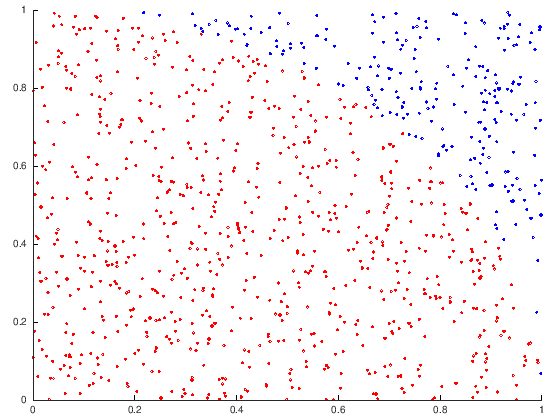

In [21]:
X = rand(1000, 1);
Y = rand(1000, 1);

scatter(X(X.^2 + Y.^2 <= 1), Y(X.^2 + Y.^2 <= 1), 'r'); hold on
scatter(X(X.^2 + Y.^2 > 1), Y(X.^2 + Y.^2 > 1), 'b')

In [22]:
X = rand(10000, 1);
Y = rand(10000, 1);
4 * numel(X(X.^2 + Y.^2 <= 1)) / numel(X)

ans =  3.1524


#### 4. Feladat

Végezzük el valami egyszerű, számunkra érdekes, véletlenen alapuló jelenség szimulációját.